## SCS_3253 Machine Learning - Term Project

## School Safety Zone: Watch Your Speed Program

### Group 6
Students: Aniket Ajit Ingale, Zlata Izvalava

## Notebook 2 - Data transformation, model training and evaluation

In [1]:
import numpy as np
import pandas as pd

%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

np.random.seed(123)

In [2]:
from sklearn.model_selection import train_test_split, StratifiedShuffleSplit, cross_val_score, GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder, PolynomialFeatures
from sklearn.compose import ColumnTransformer

from sklearn.metrics import mean_squared_error

### Load the training and test sets

In [3]:
# Read the training set

train_set = pd.read_csv('data_school_safety_zones/train_set.csv', index_col=0)
train_set.head()

,hour,day_of_week,month,over_50
1008,16,5,5,374
3117,13,2,7,346
7510,16,5,1,304
6898,4,1,1,95
6735,9,1,12,257


In [4]:
# Read the test set

test_set = pd.read_csv('data_school_safety_zones/test_set.csv', index_col=0)
test_set.head()

,hour,day_of_week,month,over_50
6048,18,0,12,141
6897,3,1,1,67
1432,8,2,5,287
3221,21,6,8,258
7175,17,5,1,302


In [5]:
# Separate the predictors and the labels in the training and test sets

X_train = train_set.drop('over_50', axis=1)
y_train = train_set['over_50'].copy()

X_test = test_set.drop('over_50', axis=1)
y_test = test_set['over_50'].copy()

print(X_train.shape)
print(X_test.shape)

(6378, 3)
(1595, 3)


### One-hot encoding of categorical attributes

In [6]:
# Categorical attributes
cat_attribs = ['hour', 'day_of_week', 'month']

# Create a pipeline for transforming categorical attributes using OneHotEncoder
pipeline = ColumnTransformer([
        ('cat', OneHotEncoder(), cat_attribs),
    ])

In [7]:
# Apply the transformations

X_train_prepared = pipeline.fit_transform(X_train)
print(X_train_prepared.shape)

X_test_prepared = pipeline.transform(X_test)
print(X_test_prepared.shape)

(6378, 43)
(1595, 43)


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:415: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used a LabelEncoder before this OneHotEncoder to convert the categories to integers, then you can now use the OneHotEncoder directly.
  warnings.warn(msg, FutureWarning)


## Training different regression models

### Linear Regression Model

In [8]:
# Train a Linear Regression model

from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(X_train_prepared, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [9]:
# Training error

lin_train_pred = lin_reg.predict(X_train_prepared)
lin_mse = mean_squared_error(y_train, lin_train_pred)
lin_rmse = np.sqrt(lin_mse)
lin_rmse

43.90237074827136

In [10]:
# Function to display the cross-validation scores details

def display_scores(scores):
    print("Scores:", scores)
    print("Mean:", scores.mean())
    print("Standard deviation:", scores.std())

In [11]:
# Evaluation using cross-validation

lin_scores = cross_val_score(lin_reg, X_train_prepared, y_train,
                             scoring="neg_mean_squared_error", cv=3)
lin_rmse_scores = np.sqrt(-lin_scores)
display_scores(lin_rmse_scores)

Scores: [44.19952392 45.72431402 42.78788892]
Mean: 44.23724228311183
Standard deviation: 1.1990871798676772


### Lasso Regression Model

In [12]:
# GridSearchCV for the Lasso Regression model

from sklearn.linear_model import Lasso

param_grid = [{'alpha': [0.001,0.01,0.1,1,10,100,1000]}]
grid_search_lr = GridSearchCV(Lasso(tol=0.05, random_state=123), param_grid, cv=3, scoring='neg_mean_squared_error')
grid_search_lr.fit(X_train_prepared, y_train)

GridSearchCV(cv=3, error_score='raise-deprecating',
             estimator=Lasso(alpha=1.0, copy_X=True, fit_intercept=True,
                             max_iter=1000, normalize=False, positive=False,
                             precompute=False, random_state=123,
                             selection='cyclic', tol=0.05, warm_start=False),
             iid='warn', n_jobs=None,
             param_grid=[{'alpha': [0.001, 0.01, 0.1, 1, 10, 100, 1000]}],
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='neg_mean_squared_error', verbose=0)

In [13]:
# The best parameter and the RMSE score

print(grid_search_lr.best_params_)
print(np.sqrt(-grid_search_lr.best_score_))

{'alpha': 0.001}
44.25352780385339


In [14]:
# The best Lasso model

grid_search = grid_search_lr
final_model = grid_search.best_estimator_

In [15]:
# Training error

y_tr_estimation = final_model.predict(X_train_prepared)

final_mse = mean_squared_error(y_train, y_tr_estimation)
final_rmse = np.sqrt(final_mse)
print(final_rmse)

43.90238356964666


The training and cross_validation RMSEs for Lasso Regression (alpha=0.001) are almost the same as the corresponding results for Linear Regression.

### Ridge Regression Model

In [16]:
# GridSearchCV for the Ridge Regression model

from sklearn.linear_model import Ridge

param_grid = [{'alpha': [0.001,0.01,0.1,1,10,100,1000]}]
grid_search_rr = GridSearchCV(Ridge(random_state=123), param_grid, cv=3, scoring='neg_mean_squared_error')
grid_search_rr.fit(X_train_prepared, y_train)

GridSearchCV(cv=3, error_score='raise-deprecating',
             estimator=Ridge(alpha=1.0, copy_X=True, fit_intercept=True,
                             max_iter=None, normalize=False, random_state=123,
                             solver='auto', tol=0.001),
             iid='warn', n_jobs=None,
             param_grid=[{'alpha': [0.001, 0.01, 0.1, 1, 10, 100, 1000]}],
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='neg_mean_squared_error', verbose=0)

In [17]:
# The best parameter and the RMSE score

print(grid_search_rr.best_params_)
print(np.sqrt(-grid_search_rr.best_score_))

{'alpha': 0.1}
44.25264328271856


In [18]:
# The best Ridge model

grid_search = grid_search_rr
final_model = grid_search.best_estimator_

In [19]:
# Training error

y_tr_estimation = final_model.predict(X_train_prepared)

final_mse = mean_squared_error(y_train, y_tr_estimation)
final_rmse = np.sqrt(final_mse)
print(final_rmse)

43.90241583359179


The training and cross_validation RMSEs for Ridge Regression (alpha=0.1) are almost the same as the corresponding results for Linear Regression.

### Polynomial Regression Model

In [20]:
# Polynomial Regression (degree=2)

from sklearn.preprocessing import PolynomialFeatures

polynomial_features= PolynomialFeatures(degree=2)

poly_reg = LinearRegression()
poly_reg.fit(polynomial_features.fit_transform(X_train_prepared), y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [21]:
# Training error

poly_train_pred = poly_reg.predict(polynomial_features.transform(X_train_prepared))
poly_mse = mean_squared_error(y_train, poly_train_pred)
poly_rmse = np.sqrt(poly_mse)
poly_rmse

33.93852850285776

In [22]:
# Evaluation using cross-validation

poly_scores = cross_val_score(poly_reg, polynomial_features.transform(X_train_prepared), y_train,
                             scoring="neg_mean_squared_error", cv=3)
poly_rmse_scores = np.sqrt(-poly_scores)
display_scores(poly_rmse_scores)

Scores: [37.99217166 38.92870669 36.36749086]
Mean: 37.762789735470754
Standard deviation: 1.0581174126920299


The training and cross_validation RMSEs for Polynomial Regression (degree=2) are lower than the corresponding errors for Linear Regression.

### Linear SVM Regression

In [23]:
# Linear SVM Regression with standard parameters

from sklearn.svm import LinearSVR

svm_reg = LinearSVR(random_state=123)
svm_reg.fit(X_train_prepared, y_train)

LinearSVR(C=1.0, dual=True, epsilon=0.0, fit_intercept=True,
          intercept_scaling=1.0, loss='epsilon_insensitive', max_iter=1000,
          random_state=123, tol=0.0001, verbose=0)

In [24]:
# Training error

svm_train_pred = svm_reg.predict(X_train_prepared)
svm_mse = mean_squared_error(y_train, svm_train_pred)
svm_rmse = np.sqrt(svm_mse)
svm_rmse

45.6076677236287

In [25]:
# cross_val_score

svm_scores = cross_val_score(svm_reg, X_train_prepared, y_train,
                             scoring="neg_mean_squared_error", cv=3)
svm_rmse_scores = np.sqrt(-svm_scores)
display_scores(svm_rmse_scores)

Scores: [47.36733838 48.46821238 46.5699213 ]
Mean: 47.46849068888832
Standard deviation: 0.7782677752782777


The results are slightly worse than the results for the Linear Regression model.

### SVM Regression using a second-degree polynomial kernel

In [26]:
from sklearn.svm import SVR

svm_poly_reg = SVR(kernel="poly", degree=2)
svm_poly_reg.fit(X_train_prepared, y_train)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


SVR(C=1.0, cache_size=200, coef0=0.0, degree=2, epsilon=0.1,
    gamma='auto_deprecated', kernel='poly', max_iter=-1, shrinking=True,
    tol=0.001, verbose=False)

In [27]:
svm_poly_train_pred = svm_poly_reg.predict(X_train_prepared)
svm_poly_mse = mean_squared_error(y_train, svm_poly_train_pred)
svm_poly_rmse = np.sqrt(svm_poly_mse)
svm_poly_rmse

99.24501488930731

In [28]:
# cross_val_score

svm_poly_scores = cross_val_score(svm_poly_reg, X_train_prepared, y_train,
                             scoring="neg_mean_squared_error", cv=3)
svm_poly_rmse_scores = np.sqrt(-svm_poly_scores)
display_scores(svm_poly_rmse_scores)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


Scores: [ 99.43868329 100.2627867   98.31836168]
Mean: 99.33994389033535
Standard deviation: 0.7968727499746693


The RMSE values are very high.

### XGBoost Regression Model

In [29]:
# GridSearchCV for the XGBRegressor

from xgboost.sklearn import XGBRegressor

param_grid = { 'gamma':[0.5, 0.8, 1.0]}

grid_search_xgb = GridSearchCV(XGBRegressor(objective='reg:squarederror', random_state=123), param_grid, cv=3, 
                               scoring='neg_mean_squared_error')

grid_search_xgb.fit(X_train_prepared, y_train)

GridSearchCV(cv=3, error_score='raise-deprecating',
             estimator=XGBRegressor(base_score=None, booster=None,
                                    colsample_bylevel=None,
                                    colsample_bynode=None,
                                    colsample_bytree=None, gamma=None,
                                    gpu_id=None, importance_type='gain',
                                    interaction_constraints=None,
                                    learning_rate=None, max_delta_step=None,
                                    max_depth=None, min_child_weight=None,
                                    missing=nan, monotone_constrain...
                                    num_parallel_tree=None,
                                    objective='reg:squarederror',
                                    random_state=123, reg_alpha=None,
                                    reg_lambda=None, scale_pos_weight=None,
                                    subsample=None, tree_

In [30]:
# The best parameter and the RMSE score

print(grid_search_xgb.best_params_)
print(np.sqrt(-grid_search_xgb.best_score_))

{'gamma': 1.0}
39.658952918849735


In [31]:
# The best XGBRegressor model

grid_search = grid_search_xgb
final_model = grid_search.best_estimator_

In [32]:
# Training error

y_tr_estimation = final_model.predict(X_train_prepared)

final_mse = mean_squared_error(y_train, y_tr_estimation)
final_rmse = np.sqrt(final_mse)
print(final_rmse)

30.747971751598968


The results for XGBoost Regression (gamma=0.8) are slightly better than for the Linear Regression model

### Random Forest Regression Model

In [33]:
# Random Forest Regressor with standard parameters

from sklearn.ensemble import RandomForestRegressor

forest_reg = RandomForestRegressor(random_state=123)
forest_reg.fit(X_train_prepared, y_train)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=10,
                      n_jobs=None, oob_score=False, random_state=123, verbose=0,
                      warm_start=False)

In [34]:
# Training error

forest_predictions = forest_reg.predict(X_train_prepared)
forest_mse = mean_squared_error(y_train, forest_predictions)
forest_rmse = np.sqrt(forest_mse)
forest_rmse

30.143180285704446

In [35]:
# Cross-validation

forest_scores = cross_val_score(forest_reg, X_train_prepared, y_train,
                                scoring="neg_mean_squared_error", cv=3)
forest_rmse_scores = np.sqrt(-forest_scores)
display_scores(forest_rmse_scores)

Scores: [41.78200421 42.40232546 40.32130164]
Mean: 41.50187710456822
Standard deviation: 0.8723601797080229


The score on the training set is much lower than on the validation sets, the model is overfitting the training set. 

Next, we will try to regularize the model using the 'min_samples_leaf' hyperparameter.

**Tune the Random Forest model:**

In [36]:
# Tuning the Random Forest using grid search

param_grid = [
    {'n_estimators': [100, 200, 300], 'min_samples_leaf': [8, 12, 16]}
  ]

forest_reg = RandomForestRegressor(random_state=123)

grid_search = GridSearchCV(forest_reg, param_grid, cv=3,
                           scoring='neg_mean_squared_error', return_train_score=True)

grid_search.fit(X_train_prepared, y_train)

GridSearchCV(cv=3, error_score='raise-deprecating',
             estimator=RandomForestRegressor(bootstrap=True, criterion='mse',
                                             max_depth=None,
                                             max_features='auto',
                                             max_leaf_nodes=None,
                                             min_impurity_decrease=0.0,
                                             min_impurity_split=None,
                                             min_samples_leaf=1,
                                             min_samples_split=2,
                                             min_weight_fraction_leaf=0.0,
                                             n_estimators='warn', n_jobs=None,
                                             oob_score=False, random_state=123,
                                             verbose=0, warm_start=False),
             iid='warn', n_jobs=None,
             param_grid=[{'min_samples_leaf': [8, 12, 16]

In [37]:
# The best parameters

grid_search.best_params_

{'min_samples_leaf': 8, 'n_estimators': 200}

In [38]:
# RMSEs and parameter combinations
# For the parameters {'min_samples_leaf': 8, 'n_estimators': 200}: the RMSE is approximately 38.1

cvres = grid_search.cv_results_
for mean_score, params in zip(cvres["mean_test_score"], cvres["params"]):
    print(np.sqrt(-mean_score), params)

38.182620732220194 {'min_samples_leaf': 8, 'n_estimators': 100}
38.14730839445685 {'min_samples_leaf': 8, 'n_estimators': 200}
38.15974165261285 {'min_samples_leaf': 8, 'n_estimators': 300}
39.593257130317255 {'min_samples_leaf': 12, 'n_estimators': 100}
39.53716262396543 {'min_samples_leaf': 12, 'n_estimators': 200}
39.55098233195351 {'min_samples_leaf': 12, 'n_estimators': 300}
41.36177637779206 {'min_samples_leaf': 16, 'n_estimators': 100}
41.31277883016179 {'min_samples_leaf': 16, 'n_estimators': 200}
41.31427501032564 {'min_samples_leaf': 16, 'n_estimators': 300}


In [39]:
# Feature importances

feature_importances = grid_search.best_estimator_.feature_importances_
feature_importances

array([0.08549076, 0.1455145 , 0.15368587, 0.15383685, 0.15251331,
       0.06601001, 0.01070959, 0.01290117, 0.00684721, 0.0018742 ,
       0.0008998 , 0.00038377, 0.00046798, 0.00031686, 0.00033795,
       0.00100332, 0.00346499, 0.0049678 , 0.00146507, 0.00049306,
       0.00267088, 0.00821382, 0.01758708, 0.04882823, 0.02814383,
       0.002616  , 0.00125077, 0.00138928, 0.00234663, 0.00413301,
       0.02080567, 0.00260991, 0.00186506, 0.0029217 , 0.01263027,
       0.00201938, 0.00348387, 0.01235886, 0.0108131 , 0.00325649,
       0.0023311 , 0.00133845, 0.00320252])

In [40]:
# The order of the OneHotEncoder categories: 'hour' categories, 'day_of_week' categories, 'month' categories

cat_encoder = pipeline.named_transformers_['cat']
attributes = cat_encoder.get_feature_names(['hour', 'day', 'month'])
attributes

array(['hour_0.0', 'hour_1.0', 'hour_2.0', 'hour_3.0', 'hour_4.0',
       'hour_5.0', 'hour_6.0', 'hour_7.0', 'hour_8.0', 'hour_9.0',
       'hour_10.0', 'hour_11.0', 'hour_12.0', 'hour_13.0', 'hour_14.0',
       'hour_15.0', 'hour_16.0', 'hour_17.0', 'hour_18.0', 'hour_19.0',
       'hour_20.0', 'hour_21.0', 'hour_22.0', 'hour_23.0', 'day_0.0',
       'day_1.0', 'day_2.0', 'day_3.0', 'day_4.0', 'day_5.0', 'day_6.0',
       'month_1.0', 'month_2.0', 'month_3.0', 'month_4.0', 'month_5.0',
       'month_6.0', 'month_7.0', 'month_8.0', 'month_9.0', 'month_10.0',
       'month_11.0', 'month_12.0'], dtype=object)

In [41]:
# Sorted feature importances

sorted(zip(feature_importances, attributes), reverse=True)

[(0.15383684546292076, 'hour_3.0'),
 (0.15368587334693162, 'hour_2.0'),
 (0.15251331213133498, 'hour_4.0'),
 (0.14551449521300122, 'hour_1.0'),
 (0.08549076438743138, 'hour_0.0'),
 (0.06601001278548455, 'hour_5.0'),
 (0.048828232269261126, 'hour_23.0'),
 (0.028143831244114733, 'day_0.0'),
 (0.020805669947434224, 'day_6.0'),
 (0.017587078534325236, 'hour_22.0'),
 (0.012901169318817286, 'hour_7.0'),
 (0.01263026637454596, 'month_4.0'),
 (0.012358858630499079, 'month_7.0'),
 (0.010813099927415602, 'month_8.0'),
 (0.010709586653032928, 'hour_6.0'),
 (0.008213823695388194, 'hour_21.0'),
 (0.006847214416231431, 'hour_8.0'),
 (0.004967804633575003, 'hour_17.0'),
 (0.0041330121188437995, 'day_5.0'),
 (0.0034838693569247997, 'month_6.0'),
 (0.0034649901841821303, 'hour_16.0'),
 (0.0032564889840574662, 'month_9.0'),
 (0.003202515672902286, 'month_12.0'),
 (0.0029216997026139018, 'month_3.0'),
 (0.0026708834349234004, 'hour_20.0'),
 (0.002616004571962893, 'day_1.0'),
 (0.00260991420227172, 'month

In [42]:
# The best Random Forest model

rf_best_model = grid_search.best_estimator_

In [43]:
# Training error

rf_train_pred = rf_best_model.predict(X_train_prepared)
rf_mse = mean_squared_error(y_train, rf_train_pred)
rf_rmse = np.sqrt(rf_mse)
rf_rmse

35.133003217911494

Now, the scores for the training set and validation sets are much closer (35.1 and 38.1 respectively). These results are better than the results for the Linear Regression model and are comparable with the scores for Polynomial Regression.

The following models showed the best performance with very close results: **Polynomial Regression (degree=2)** and **Random Forest Regression (n_estimators=200, min_samples_leaf=8)**

## Evaluate two best models on the test set

### Polynomial Regression generalization error

In [44]:
# Test error

poly_test_pred = poly_reg.predict(polynomial_features.transform(X_test_prepared))
poly_test_mse = mean_squared_error(y_test, poly_test_pred)
poly_test_rmse = np.sqrt(poly_test_mse)
poly_test_rmse

36.965901016620606

In [45]:
# 95% Confidence interval for the test RMSE

from scipy import stats

confidence = 0.95
squared_errors = (poly_test_pred - y_test) ** 2

np.sqrt(stats.t.interval(confidence, len(squared_errors) - 1,
                         loc=squared_errors.mean(),
                         scale=stats.sem(squared_errors)))

array([33.8591169 , 39.83109186])

In [46]:
# NRMSE
# The estimates are off by an average of 15.6%

nrmse = poly_test_rmse / y_test.mean()
nrmse

0.15550817127219416

### Random Forest Regression generalization error

In [47]:
# Test error

rf_test_pred = rf_best_model.predict(X_test_prepared)
rf_test_mse = mean_squared_error(y_test, rf_test_pred)
rf_test_rmse = np.sqrt(rf_test_mse)
rf_test_rmse

37.65101698229384

In [48]:
# 95% Confidence interval for the test RMSE

confidence = 0.95
squared_errors = (rf_test_pred - y_test) ** 2

np.sqrt(stats.t.interval(confidence, len(squared_errors) - 1,
                         loc=squared_errors.mean(),
                         scale=stats.sem(squared_errors)))

array([34.58368118, 40.48662935])

In [49]:
# NRMSE
# The estimates are off by an average of 15.8%

nrmse2 = rf_test_rmse / y_test.mean()
nrmse2

0.15839031746642124

**The results for two models are very close. Polynomial Regression Model performed slightly better, it can be chosen as a final model.**

## Full pipeline for Polynomial Regression

In [50]:
# Full pipeline (including encoding and model)

polynomial_regression = Pipeline([
        ('encoder', OneHotEncoder()),
        ('poly_features', PolynomialFeatures(degree=2)),
        ('lin_reg', LinearRegression())
    ])

polynomial_regression.fit(X_train, y_train)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:415: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used a LabelEncoder before this OneHotEncoder to convert the categories to integers, then you can now use the OneHotEncoder directly.
  warnings.warn(msg, FutureWarning)


Pipeline(memory=None,
         steps=[('encoder',
                 OneHotEncoder(categorical_features=None, categories=None,
                               drop=None, dtype=<class 'numpy.float64'>,
                               handle_unknown='error', n_values=None,
                               sparse=True)),
                ('poly_features',
                 PolynomialFeatures(degree=2, include_bias=True,
                                    interaction_only=False, order='C')),
                ('lin_reg',
                 LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
                                  normalize=False))],
         verbose=False)

### Predictions - Example

In [51]:
# Predict hourly counts of vehicles in speed bin "50 km/hr and higher" for October 16, 2020 (if city traffic is back to normal)

# Create input data: all hour values (from 0 to 23), Friday (value=5), October (value=10)

data = pd.DataFrame({'hour': np.arange(24)})
data['day_of_week'] = 5
data['month'] = 10
data.head()

,hour,day_of_week,month
0,0,5,10
1,1,5,10
2,2,5,10
3,3,5,10
4,4,5,10


In [52]:
# Predict 'over_50' values using full pipeline

predictions = polynomial_regression.predict(data)
predictions

array([141.4412022 ,  96.11373595,  69.06592804,  73.42382009,
        97.31703556, 212.59354794, 297.44783131, 286.79864258,
       264.72849315, 310.22002494, 341.47526194, 328.63616533,
       314.55100478, 328.47621331, 329.31880151, 339.12849177,
       353.38661064, 364.5137373 , 337.59564603, 331.52054192,
       312.70036431, 301.54907526, 252.17621508, 226.7283528 ])

In [53]:
# Predictions

data_pred = data.copy()
data_pred['over_50'] = np.round(predictions).astype(int)
data_pred

,hour,day_of_week,month,over_50
0,0,5,10,141
1,1,5,10,96
2,2,5,10,69
3,3,5,10,73
4,4,5,10,97
5,5,5,10,213
6,6,5,10,297
7,7,5,10,287
8,8,5,10,265
9,9,5,10,310


Text(0, 0.5, 'over_50')

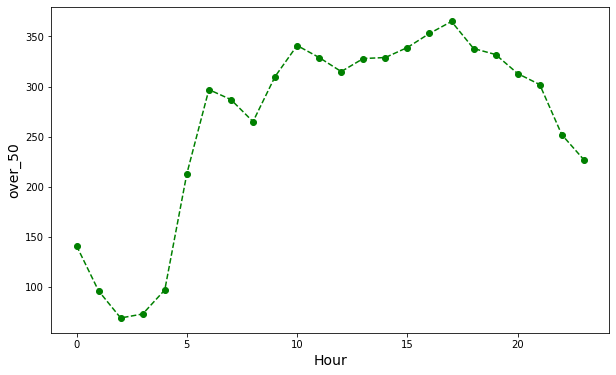

In [54]:
# Plot predictions

plt.rc('figure', figsize=(10, 6))

plt.plot(data_pred['hour'], data_pred['over_50'], 'go--')

plt.xlabel('Hour', size=14)
plt.ylabel('over_50', size=14)